# AVIATION BUSINESS TRENDS
Author: Victoria Jemutai

# OVERVIEW
This project analyzes aviation accidents' trends from 1948 upto 2022, using the NTSB Aviation accident database. The company wants to venture into the aviation business, the goal of the analysis is to determine which aircraft has the lowest risk for the company to start this new business endeavor. I have used pandas library t

# BUSINESS PROBLEM
The company is expanding in to new industries to diversify its portfolios specifically, purchasing and operating airplanes for commercial and private enteprises. They don't know anything about the potential risks of aircrafts. 
The concluding findings of this analysis should trnslate into actionable insights that the head of the new aviation division can use to decide which aircraft to purchase. 

The business questions are:
What are the trends of accidents' injury outcomes for occupants and aircraft damages?
What are the risks based on aircraft damage?
What are the risks based on occupants' injury outcomes?

# OBJECTIVES 


#DATA UNDERSTANDING 
The data used for this analysis is the NTSB Aviation accident database, containing accidents' information from 1962 upto 2022 about civil aviation accidents and selected incidents within the United States.
The data we're going to use is contained in the AviationData.csv file: has records about the aircraft makes, the accidents' 
data, injury severity and outcomes etc. that will be used to answer our business questions. 



#REQUIREMENTS
1. Load the data with pandas 
Create a dataframe, aviation_df that will represent the CSV file. Use pandas methods to inspect the shape and other attributes of these dataframes.
2. Perform data cleaning required to answer the first question.
 

## Load the data with pandas 

In [1]:
#import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#load the data 
aviation_df= pd.read_csv('Data/AviationData.csv', encoding= 'latin1', low_memory= False)
aviation_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
aviation_df.shape

(88889, 31)

In [5]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Perform data cleaning required to answer the first question.
The first question is: What are the trends of accidents' injury outcomes for occupants and aircraft damages?
For this we'll need to:
1. Identify and handle missing values 
2. Handle the data types 
3. Analyze the data
4. Visualize the analysis

### Identifying and handling missing values 

In [6]:
aviation_df['Event.Date']

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
88884    2022-12-26
88885    2022-12-26
88886    2022-12-26
88887    2022-12-26
88888    2022-12-29
Name: Event.Date, Length: 88889, dtype: object

In [7]:
aviation_df['Event.Date']= pd.to_datetime(aviation_df['Event.Date'])
aviation_df['Event.Date']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: Event.Date, Length: 88889, dtype: datetime64[ns]

In [8]:
aviation_df['Event.Date'].isnull().sum()

0

In [9]:
date_= aviation_df['Event.Date']
date_

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: Event.Date, Length: 88889, dtype: datetime64[ns]

The event dates don't have any missing values, I'll then proceed to injury outcomes.

In [10]:
aviation1= aviation_df.loc[:, ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
aviation1


,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,2.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0
2,3.0,NaN,NaN,NaN
3,2.0,0.0,0.0,0.0
4,1.0,2.0,NaN,0.0
...,...,...,...,...
88884,0.0,1.0,0.0,0.0
88885,0.0,0.0,0.0,0.0
88886,0.0,0.0,0.0,1.0
88887,0.0,0.0,0.0,0.0


Visualization

In [11]:
aviation_df['Event.Date']= pd.to_datetime(aviation_df['Event.Date'])
# Count incidents per year
aviation_df['Year'] = aviation_df['Event.Date'].dt.year

#replace NaN values with 0 for better visualization
outcome_columns= ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
aviation_df[outcome_columns]= aviation_df[outcome_columns].fillna(0)

#aggregate injury outcomes per year
outcome_trends = aviation_df.groupby('Year')[outcome_columns].sum().reset_index()




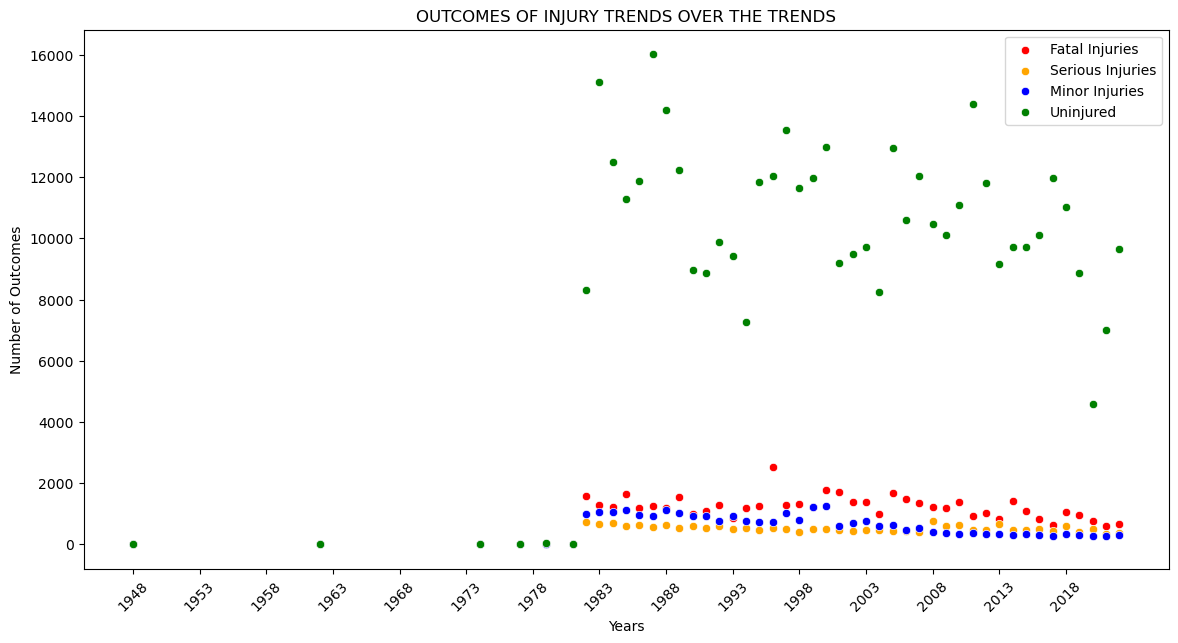

In [12]:
# Create Figure and Axes
fig, ax = plt.subplots(figsize=(14, 7))

# Scatter plot for each injury type
sns.scatterplot(data=outcome_trends, x='Year', y='Total.Fatal.Injuries', color='red', label="Fatal Injuries", ax=ax)
sns.scatterplot(data=outcome_trends, x='Year', y='Total.Serious.Injuries', color='orange', label="Serious Injuries", ax=ax)
sns.scatterplot(data=outcome_trends, x='Year', y='Total.Minor.Injuries', color='blue', label="Minor Injuries", ax=ax)
sns.scatterplot(data=outcome_trends, x='Year', y='Total.Uninjured', color='green', label="Uninjured", ax=ax)

#labels and title 
ax.set_xlabel('Years')
ax.set_ylabel('Number of Outcomes')
ax.set_title('OUTCOMES OF INJURY TRENDS OVER THE TRENDS')

# Rotate x-axis labels for readability
ax.set_xticks(range(aviation_df['Year'].min(), aviation_df['Year'].max(), 5))
ax.set_xticklabels(ax.get_xticks(), rotation=45);


Now we can visualize the aircraft damage per make for all the years. I'll start by preparing the data used to amswer this question: aircraft damage, make and years

In [13]:
aviation_df['Make'].isnull().sum()

63

In [14]:
aviation_df['Aircraft.damage'].isnull().sum()

3194

In [15]:
aviation_df.loc[:, ['Make', 'Aircraft.damage', 'Event.Date']]

,Make,Aircraft.damage,Event.Date
0,Stinson,Destroyed,1948-10-24
1,Piper,Destroyed,1962-07-19
2,Cessna,Destroyed,1974-08-30
3,Rockwell,Destroyed,1977-06-19
4,Cessna,Destroyed,1979-08-02
...,...,...,...
88884,PIPER,NaN,2022-12-26
88885,BELLANCA,NaN,2022-12-26
88886,AMERICAN CHAMPION AIRCRAFT,Substantial,2022-12-26
88887,CESSNA,NaN,2022-12-26


From the data, we can visualize a time series plot for accidents trends over time:

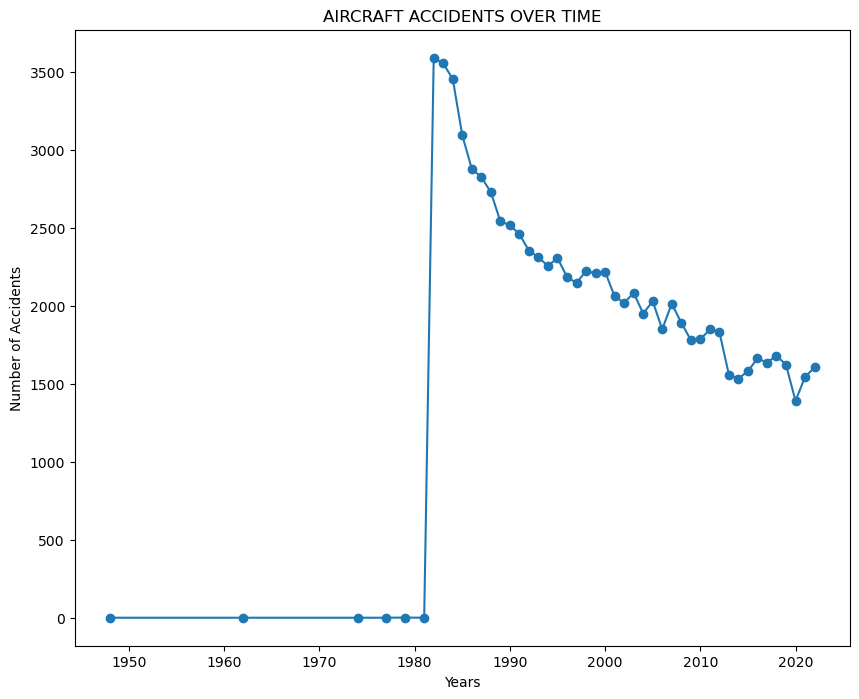

In [16]:

aviation_df['Event.Date']= pd.to_datetime(aviation_df['Event.Date'])
# Count incidents per year
aviation_df['Year'] = aviation_df['Event.Date'].dt.year
yearly_counts = aviation_df.groupby('Year').size()

# Plot
fig,ax= plt.subplots(figsize=(10,8))
ax.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')

# Add labels for x and y axes
ax.set_xlabel('Years')
ax.set_ylabel('Number of Accidents')

# Add a title for the plot
ax.set_title('AIRCRAFT ACCIDENTS OVER TIME');


From the visualization we can see that there were zero number of accidents from years under 1980, because full narrative descriptions may not be available for dates before 1993, cases under revision, or where NTSB did not have primary investigative responsibility. Therefore, I'll customize the plot to only show values from 1980. 

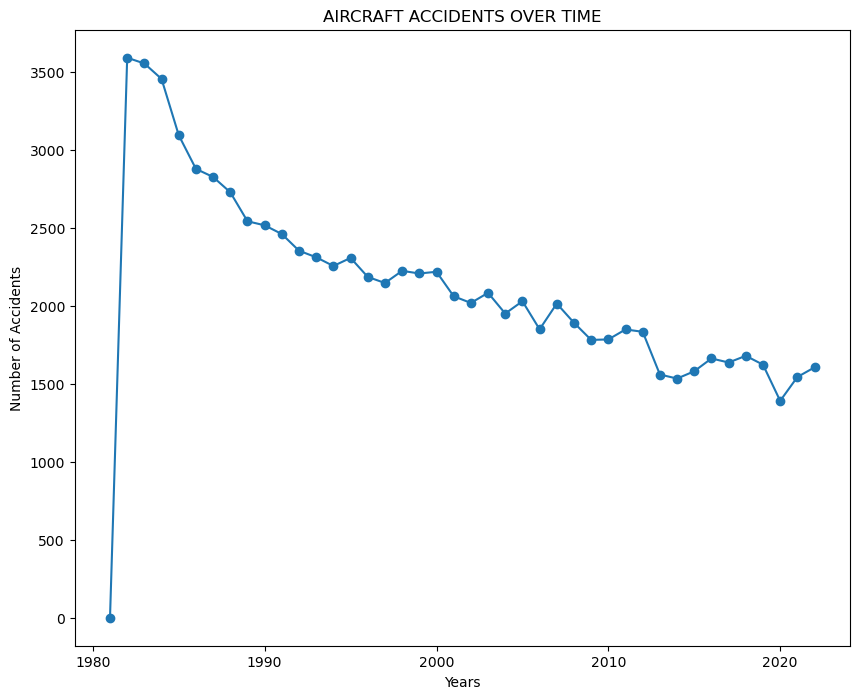

In [17]:
aviation_df['Event.Date']= pd.to_datetime(aviation_df['Event.Date'])
# Count incidents per year
aviation_df['Year'] = aviation_df['Event.Date'].dt.year


# filter for years 1980 and later
years_filtered= aviation_df[aviation_df['Year']>1980]
yearly_counts = years_filtered.groupby('Year').size()

# Plot
fig,ax= plt.subplots(figsize=(10,8))
ax.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')

# Add labels for x and y axes
ax.set_xlabel('Years')
ax.set_ylabel('Number of Accidents')

# Add a title for the plot
ax.set_title('AIRCRAFT ACCIDENTS OVER TIME');

EXPLAIN

Now we can visualize trend in aircraft damage for each make

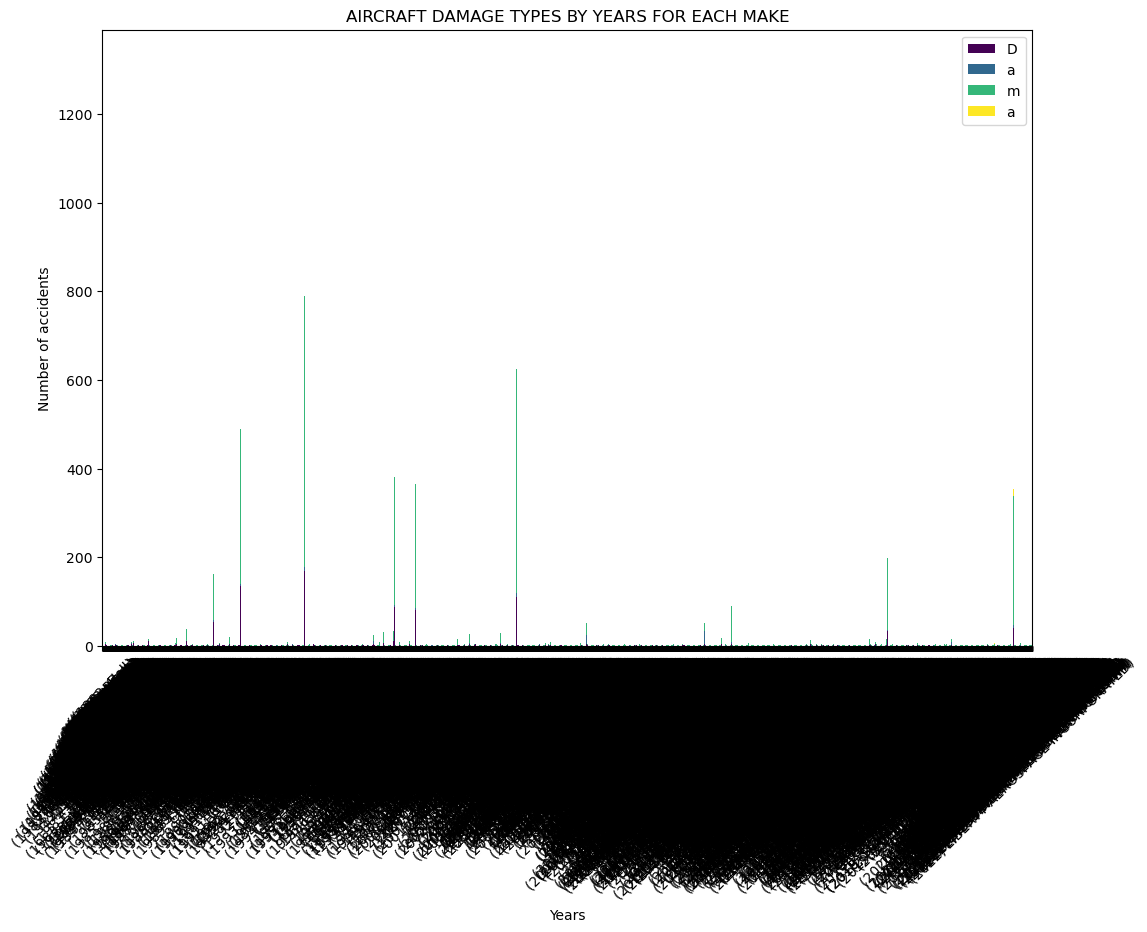

In [19]:
aviation_df['Event.Date']= pd.to_datetime(aviation_df['Event.Date'])
# Count incidents per year
aviation_df['Year'] = aviation_df['Event.Date'].dt.year

#drop rows with missing damage types
damage_= aviation_df.dropna(subset=['Aircraft.damage'])

#group by year, make, and aircraft damage
damage_counts = damage_.groupby(['Year','Make', 'Aircraft.damage']).size().unstack()

#plot
fig, ax= plt.subplots(figsize=(12,8))
damage_counts.plot(kind='bar',stacked=True, ax=ax, colormap='viridis')

#labels and titles
ax.set_xlabel('Years')
ax.set_ylabel('Number of accidents')
ax.set_title('AIRCRAFT DAMAGE TYPES BY YEARS FOR EACH MAKE')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend('Damage type');

